# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from skimage import io
from skimage import color
import pandas as pd

# Development or AWS switch

In [2]:
usingAWS = False

# Assign Data Directories
if usingAWS == True:
    # AWS directory
    train_directory = '../simpsons_train_scaled'
    test_directory = '../simpsons_test_scaled'
else:
    # Local directory
    train_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_train_scaled'
    test_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_test_scaled'

# Get Train Images & Assign Id

In [3]:
classes = os.listdir(train_directory)
class_indices = np.arange(len(classes))
class_dict = dict(zip(classes, class_indices))
class_dict

{'abraham_grampa_simpson': 0,
 'agnes_skinner': 1,
 'apu_nahasapeemapetilon': 2,
 'barney_gumble': 3,
 'bart_simpson': 4,
 'bumblebee_man': 5,
 'carl_carlson': 6,
 'charles_montgomery_burns': 7,
 'chief_wiggum': 8,
 'cletus_spuckler': 9,
 'comic_book_guy': 10,
 'disco_stu': 11,
 'edna_krabappel': 12,
 'fat_tony': 13,
 'gil': 14,
 'groundskeeper_willie': 15,
 'hans_moleman': 16,
 'helen_lovejoy': 17,
 'homer_simpson': 18,
 'jasper_beardly': 19,
 'jimbo_jones': 20,
 'kent_brockman': 21,
 'krusty_the_clown': 22,
 'lenny_leonard': 23,
 'lionel_hutz': 24,
 'lisa_simpson': 25,
 'maggie_simpson': 26,
 'marge_simpson': 27,
 'martin_prince': 28,
 'mayor_quimby': 29,
 'milhouse_van_houten': 30,
 'miss_hoover': 31,
 'moe_szyslak': 32,
 'ned_flanders': 33,
 'nelson_muntz': 34,
 'otto_mann': 35,
 'patty_bouvier': 36,
 'principal_skinner': 37,
 'professor_john_frink': 38,
 'rainier_wolfcastle': 39,
 'ralph_wiggum': 40,
 'selma_bouvier': 41,
 'sideshow_bob': 42,
 'sideshow_mel': 43,
 'snake_jailbird'

In [4]:
totalClasses = 5
totalPicsPerClass = 5

def getDirs(main):
    classes = os.listdir(main)[0:totalClasses]
    combo = []
    [combo.append([class_dict[clas], clas, main + '/' + clas]) for clas in classes]
    return(combo)

def getPics(directory):
    pics = os.listdir(directory)[0:totalPicsPerClass]
    picPath = [directory + '/' + pic for pic in pics]
    return(picPath)

def readImage(imagePath):
    pix = io.imread(imagePath)
    grayPix = color.rgb2gray(pix)
    return(grayPix)

imageDirs = getDirs(train_directory)
s = list(map(lambda x: [x[0], x[1], getPics(x[2])], imageDirs))

trainPix = []
for arr in s:
    for picArray in arr[2]:
        pix = readImage(picArray)
        trainPix.append([arr[0], arr[1], pix])

In [5]:
len(trainPix)

25

# Print out the first 10 pics

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


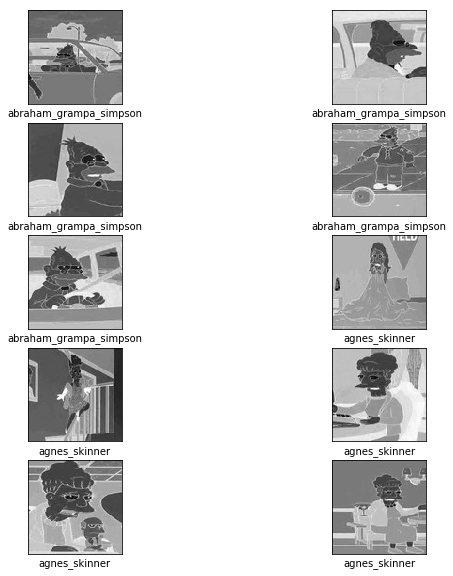

In [6]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(trainPix[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(trainPix[i][2], cmap=plt.cm.binary)
    plt.xlabel(trainPix[i][1])

# PreProcess RGB values from 0 to 1

In [7]:
labels = list(map(lambda x: x[0], trainPix))
names = list(map(lambda x: x[1], trainPix))
images = list(map(lambda x: x[2], trainPix))
preProcessedImages = list(map(lambda x: x/1, images)) # Only needed if no gray-scaling

In [8]:
labels = np.array(labels)
names = np.array(names)
images = np.array(images)
preProcessedImages = np.array(preProcessedImages)
labels.shape, images.shape

((25,), (25, 100, 100))

# Variation of groups within Train Images

In [9]:
trainDF = pd.DataFrame(names, columns=["characters"])
grp = trainDF.groupby("characters").agg({"characters":"count"})
percents = grp.groupby(level=0).apply(lambda x: 100 * x / len(trainDF))
percents

,characters
characters,
abraham_grampa_simpson,20
agnes_skinner,20
apu_nahasapeemapetilon,20
barney_gumble,20
bart_simpson,20


# Model Construction

## Model Layers

In [10]:
model_classes = len(classes)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(model_classes, activation=tf.nn.softmax)
])

## Model Functions (optimzer, accuracy)

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit Model to training data

In [12]:
model.fit(preProcessedImages, labels, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 25ms/step - loss: 3.9493 - acc: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 4.0261 - acc: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 3.2151 - acc: 0.2000
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 2.7675 - acc: 0.2800
Epoch 5/10
25/25 [==============================] - 0s 503us/step - loss: 2.3630 - acc: 0.4000
Epoch 6/10
25/25 [==============================] - 0s 755us/step - loss: 2.0121 - acc: 0.5200
Epoch 7/10
25/25 [==============================] - 0s 805us/step - loss: 1.6627 - acc: 0.5600
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 1.3937 - acc: 0.6000
Epoch 9/10
25/25 [==============================] - 0s 731us/step - loss: 1.2146 - acc: 0.6800
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 1.0808 - acc: 0.6000


# Evaluate Accuracy w/ Test Set

In [13]:
# Get all test images into a similar format given the one directory they are all in
test_pics = os.listdir(test_directory)

def getClass(pic):
    if pic != '.DS_Store':
        character = re.sub('_[0-9]{1,2}.jpg$', '', pic)
        return(character)

classes = list(map(lambda x: x[1], trainPix))
classes = np.array(classes)
uClasses = np.unique(classes)
    
test = []
for pic in test_pics:
    if pic != '.DS_Store':
        path = test_directory + '/' + pic
        pix_array = io.imread(path)
        pix_array = color.rgb2gray(pix_array)
        character_label = getClass(pic)
        if character_label == uClasses[0] or character_label == uClasses[1] or character_label == uClasses[2]:
            test.append([class_dict[character_label], character_label, pix_array])

In [14]:
len(uClasses), len(np.unique(np.array(list(map(lambda x: x[1], test)))))

(5, 2)

In [15]:
test_images = list(map(lambda x: x[2], test))
test_images = np.array(test_images)

ppTest_images = list(map(lambda x: x/1, test_images))
ppTest_images = np.array(ppTest_images)

test_labels = list(map(lambda x: x[0], test))
test_labels = np.array(test_labels)

test_names = list(map(lambda x: x[1], test))
test_names = np.array(test_names)

test_labels.shape, test_images.shape, test_names.shape

((98,), (98, 100, 100), (98,))

In [16]:
test_loss, test_acc = model.evaluate(ppTest_images, test_labels)

print('Test accuracy:', test_acc)

98/98 [==============================] - 0s 1ms/step
Test accuracy: 0.37755102040816324


In [17]:
predictions = model.predict(test_images)

preds = [np.argmax(pred) for pred in predictions]

def findLabel(index):
    for key, val in class_dict.items():
        if val == index:
            return(key)
            
pred_labels = [findLabel(pred) for pred in preds]
pred_labels = np.array(pred_labels)

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


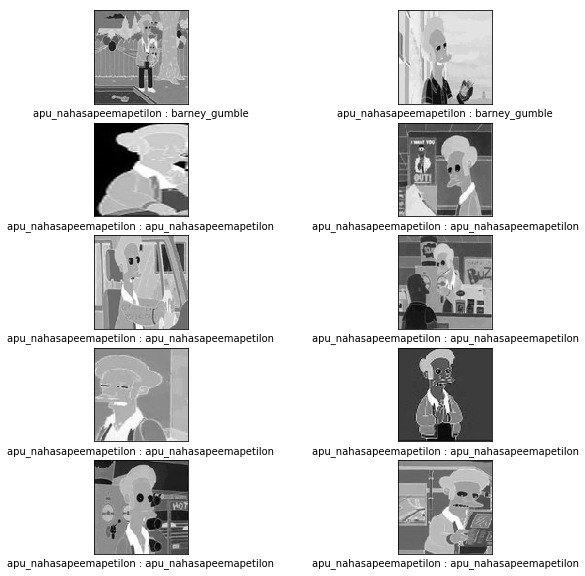

In [18]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(test_images[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i+70], cmap=plt.cm.binary)
    plt.xlabel(test_names[i+70] + " : " + pred_labels[i+70])

# Prediction Stats

In [19]:
d = {'testLabels': test_names, 'predictions': pred_labels}
predDF = pd.DataFrame(data=d)
predDF['pred'] = predDF.apply(lambda x: x[0] == x[1], axis=1)
predDF.groupby(['testLabels']).agg({'pred': {'mean': 'mean', 'count':'count'}})

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


pred      
                       count  mean
testLabels                        
abraham_grampa_simpson    48  0.00
apu_nahasapeemapetilon    50  0.74